# Activité guidée : Découverte de Pandas

In [731]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Nettoyer les titres de colonnes :
- Supprimer les espaces au début et à la fin des titres (s’il y en a)
- Remplacer les espaces par des underscores (ceux se situant entre les mots)
- Tout mettre en minuscule


In [732]:
df_anim = pd.read_csv('data/df_anim.csv')
df_veg = pd.read_csv('data/df_veg.csv')
df_pop = pd.read_csv('data/df_pop.csv')

In [733]:
for df in [df_anim, df_veg, df_pop]:
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')

### 2. Quelle sont les dimensions des jeux de données ?

In [734]:
for df in [df_anim, df_veg, df_pop]:
    print(df.shape)

(31542, 14)
(93458, 14)
(366, 14)


### 3. A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [735]:
# animals
df_anim.head(11)

,code_domaine,domaine,code_zone_(fao),zone,code_élément,élément,code_produit_(fao),produit,code_année,année,unité,valeur,symbole,description_du_symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2018,2018,kg,2.62,E,Valeur estimée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2019,2019,kg,2.73,E,Valeur estimée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,661,Disponibilité alimentaire (Kcal),2731,Viande de Bovins,2018,2018,million kcal,209191.00,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,661,Disponibilité alimentaire (Kcal),2731,Viande de Bovins,2019,2019,million kcal,222521.90,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2018,2018,g/personne/jour,1.09,E,Valeur estimée
5,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2019,2019,g/personne/jour,1.13,E,Valeur estimée
6,FBS,Bilans Alimentaires (2010-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2731,Viande de Bovins,2018,2018,g/personne/jour,1.20,E,Valeur estimée
7,FBS,Bilans Alimentaires (2010-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2731,Viande de Bovins,2019,2019,g/personne/jour,1.24,E,Valeur estimée
8,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2732,Viande d'Ovins/Caprins,2018,2018,kg,4.26,E,Valeur estimée
9,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2732,Viande d'Ovins/Caprins,2019,2019,kg,3.43,E,Valeur estimée


In [736]:
# vegetables
df_veg.head(200)
df_veg["symbole"].value_counts()

E    70320
I    23138
Name: symbole, dtype: int64

In [737]:
# population
df_pop.head()

,code_domaine,domaine,code_zone_(fao),zone,code_élément,élément,code_produit_(fao),produit,code_année,année,unité,valeur,symbole,description_du_symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,511,Population totale,2501,Population,2018,2018,1000 personnes,37172.00,X,Ciffre de sources internationales
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,511,Population totale,2501,Population,2019,2019,1000 personnes,38041.75,X,Ciffre de sources internationales
2,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,511,Population totale,2501,Population,2018,2018,1000 personnes,57793.00,X,Ciffre de sources internationales
3,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,511,Population totale,2501,Population,2019,2019,1000 personnes,58558.27,X,Ciffre de sources internationales
4,FBS,Bilans Alimentaires (2010-),3,Albanie,511,Population totale,2501,Population,2018,2018,1000 personnes,2883.00,X,Ciffre de sources internationales


### 4. Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.


In [738]:
df_veg["type"] = "vegetable"
df_anim["type"] = "animal"


produits = pd.concat([df_anim, df_veg], axis=0)
produits

,code_domaine,domaine,code_zone_(fao),zone,code_élément,élément,code_produit_(fao),produit,code_année,année,unité,valeur,symbole,description_du_symbole,type
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2018,2018,kg,2.62,E,Valeur estimée,animal
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2019,2019,kg,2.73,E,Valeur estimée,animal
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,661,Disponibilité alimentaire (Kcal),2731,Viande de Bovins,2018,2018,million kcal,209191.00,I,Valeur imputée,animal
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,661,Disponibilité alimentaire (Kcal),2731,Viande de Bovins,2019,2019,million kcal,222521.90,I,Valeur imputée,animal
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2018,2018,g/personne/jour,1.09,E,Valeur estimée,animal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93453,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,661,Disponibilité alimentaire (Kcal),2899,Miscellanees,2019,2019,million kcal,15718.43,I,Valeur imputée,vegetable
93454,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2018,2018,g/personne/jour,0.04,E,Valeur estimée,vegetable
93455,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2019,2019,g/personne/jour,0.09,E,Valeur estimée,vegetable
93456,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,684,Disponibilité de matière grasse en quantité (g...,2899,Miscellanees,2018,2018,g/personne/jour,0.01,E,Valeur estimée,vegetable


## 5. Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’.

In [739]:
df_pop.rename(columns={"valeur": "pop_1000_hab"}, inplace=True)
df_pop = df_pop[["code_zone_(fao)", "zone", "année", "pop_1000_hab"]]
df_pop

,code_zone_(fao),zone,année,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,202,Afrique du Sud,2018,57793.00
3,202,Afrique du Sud,2019,58558.27
4,3,Albanie,2018,2883.00
...,...,...,...,...
361,249,Yémen,2019,29161.92
362,251,Zambie,2018,17352.00
363,251,Zambie,2019,17861.03
364,181,Zimbabwe,2018,14438.80


### 6. Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.

In [740]:
produits = produits[["code_zone_(fao)", "zone", "produit", "année", "type", "unité" , "valeur" , 'élément' , 'code_produit_(fao)']]
produits

,code_zone_(fao),zone,produit,année,type,unité,valeur,élément,code_produit_(fao)
0,2,Afghanistan,Viande de Bovins,2018,animal,kg,2.62,Disponibilité alimentaire en quantité (kg/pers...,2731
1,2,Afghanistan,Viande de Bovins,2019,animal,kg,2.73,Disponibilité alimentaire en quantité (kg/pers...,2731
2,2,Afghanistan,Viande de Bovins,2018,animal,million kcal,209191.00,Disponibilité alimentaire (Kcal),2731
3,2,Afghanistan,Viande de Bovins,2019,animal,million kcal,222521.90,Disponibilité alimentaire (Kcal),2731
4,2,Afghanistan,Viande de Bovins,2018,animal,g/personne/jour,1.09,Disponibilité de protéines en quantité (g/pers...,2731
...,...,...,...,...,...,...,...,...,...
93453,181,Zimbabwe,Miscellanees,2019,vegetable,million kcal,15718.43,Disponibilité alimentaire (Kcal),2899
93454,181,Zimbabwe,Miscellanees,2018,vegetable,g/personne/jour,0.04,Disponibilité de protéines en quantité (g/pers...,2899
93455,181,Zimbabwe,Miscellanees,2019,vegetable,g/personne/jour,0.09,Disponibilité de protéines en quantité (g/pers...,2899
93456,181,Zimbabwe,Miscellanees,2018,vegetable,g/personne/jour,0.01,Disponibilité de matière grasse en quantité (g...,2899


### 7. Fusionnez df_pop avec products et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur la capture d’écran ci-dessous.
Note : ajouter la population à la base de données créera de la redondance dans la bdd mais simplifiera les calculs pour les questions suivantes. Ne pas supprimer df_pop.


In [741]:
df = pd.merge(df_pop, produits, on=["code_zone_(fao)", "zone", "année"]) 
df

,code_zone_(fao),zone,année,pop_1000_hab,produit,type,unité,valeur,élément,code_produit_(fao)
0,2,Afghanistan,2018,37172.00,Viande de Bovins,animal,kg,2.62,Disponibilité alimentaire en quantité (kg/pers...,2731
1,2,Afghanistan,2018,37172.00,Viande de Bovins,animal,million kcal,209191.00,Disponibilité alimentaire (Kcal),2731
2,2,Afghanistan,2018,37172.00,Viande de Bovins,animal,g/personne/jour,1.09,Disponibilité de protéines en quantité (g/pers...,2731
3,2,Afghanistan,2018,37172.00,Viande de Bovins,animal,g/personne/jour,1.20,Disponibilité de matière grasse en quantité (g...,2731
4,2,Afghanistan,2018,37172.00,Viande d'Ovins/Caprins,animal,kg,4.26,Disponibilité alimentaire en quantité (kg/pers...,2732
...,...,...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,2019,14645.47,Aliments pour enfants,vegetable,g/personne/jour,0.00,Disponibilité de matière grasse en quantité (g...,2680
124996,181,Zimbabwe,2019,14645.47,Miscellanees,vegetable,kg,2.62,Disponibilité alimentaire en quantité (kg/pers...,2899
124997,181,Zimbabwe,2019,14645.47,Miscellanees,vegetable,million kcal,15718.43,Disponibilité alimentaire (Kcal),2899
124998,181,Zimbabwe,2019,14645.47,Miscellanees,vegetable,g/personne/jour,0.09,Disponibilité de protéines en quantité (g/pers...,2899


### 8. Quelles sont les types de données de chaque colonne ?

In [742]:
df.dtypes

code_zone_(fao)         int64
zone                   object
année                   int64
pop_1000_hab          float64
produit                object
type                   object
unité                  object
valeur                float64
élément                object
code_produit_(fao)      int64
dtype: object

### 9. Combien y-a t’il de valeurs manquantes par variable ?

In [743]:
df.isna().sum()

code_zone_(fao)       0
zone                  0
année                 0
pop_1000_hab          0
produit               0
type                  0
unité                 0
valeur                0
élément               0
code_produit_(fao)    0
dtype: int64

### 10. Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [744]:
df.describe()

,code_zone_(fao),année,pop_1000_hab,valeur,code_produit_(fao)
count,125000.00,125000.00,125000.00,125000.00,125000.00
mean,128.74,2018.51,51431.25,160280.49,2635.40
std,75.25,0.50,187253.86,4074609.72,92.12
min,1.00,2018.00,10.76,-0.03,2511.00
25%,66.00,2018.00,2801.00,0.00,2560.00
50%,124.00,2019.00,9965.00,0.35,2615.00
75%,191.00,2019.00,31825.29,17.32,2734.00
max,351.00,2019.00,1465634.16,462391518.06,2899.00


In [745]:
df = df[df['valeur'] >= 0]
df.describe()

,code_zone_(fao),année,pop_1000_hab,valeur,code_produit_(fao)
count,124999.00,124999.00,124999.00,124999.00,124999.00
mean,128.74,2018.51,51431.41,160281.77,2635.40
std,75.25,0.50,187254.60,4074625.99,92.12
min,1.00,2018.00,10.76,0.00,2511.00
25%,66.00,2018.00,2801.00,0.00,2560.00
50%,124.00,2019.00,9965.00,0.35,2615.00
75%,191.00,2019.00,31825.29,17.32,2734.00
max,351.00,2019.00,1465634.16,462391518.06,2899.00


### 11. Affichez les valeurs uniques de la colonne area

In [746]:
df.zone.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique',
       'Belize', 'Bénin', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Espagne', 'Estonie',
       'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',


### 12. Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.

### 13. Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [747]:
df_index = df.set_index(["code_zone_(fao)", "zone", "année" , "pop_1000_hab" , "type","produit"])
df_index

unité  \
code_zone_(fao) zone        année pop_1000_hab type      produit                                   
2               Afghanistan 2018  37172.00     animal    Viande de Bovins                     kg   
                                                         Viande de Bovins           million kcal   
                                                         Viande de Bovins        g/personne/jour   
                                                         Viande de Bovins        g/personne/jour   
                                                         Viande d'Ovins/Caprins               kg   
...                                                                                          ...   
181             Zimbabwe    2019  14645.47     vegetable Aliments pour enfants   g/personne/jour   
                                                         Miscellanees                         kg   
                                                         Miscellanees               million kcal   
                                                         Miscellanees            g/personne/jour   
                                                         Miscellanees            g/personne/jour   

                                                                                   valeur  \
code_zone_(fao) zone        année pop_1000_hab type      produit                            
2               Afghanistan 2018  37172.00     animal    Viande de Bovins            2.62   
                                                         Viande de Bovins       209191.00   
                                                         Viande de Bovins            1.09   
                                                         Viande de Bovins            1.20   
                                                         Viande d'Ovins/Caprins      4.26   
...                                                                                   ...   
181             Zimbabwe    2019  14645.47     vegetable Aliments pour enfants       0.00   
                                                         Miscellanees                2.62   
                                                         Miscellanees            15718.43   
                                                         Miscellanees                0.09   
                                                         Miscellanees                0.04   

                                                                                                                           élément  \
code_zone_(fao) zone        année pop_1000_hab type      produit                                                                     
2               Afghanistan 2018  37172.00     animal    Viande de Bovins        Disponibilité alimentaire en quantité (kg/pers...   
                                                         Viande de Bovins                         Disponibilité alimentaire (Kcal)   
                                                         Viande de Bovins        Disponibilité de protéines en quantité (g/pers...   
                                                         Viande de Bovins        Disponibilité de matière grasse en quantité (g...   
                                                         Viande d'Ovins/Caprins  Disponibilité alimentaire en quantité (kg/pers...   
...                                                                                                                            ...   
181             Zimbabwe    2019  14645.47     vegetable Aliments pour enfants   Disponibilité de matière grasse en quantité (g...   
                                                         Miscellanees            Disponibilité alimentaire en quantité (kg/pers...   
                                                         Miscellanees                             Disponibilité alimentaire (Kcal)   
                                                         Miscellanees            Disponibilité de protéine

### 14.Faire du nettoyage dans le nom des colonnes
À ce stade votre jeu de données doit ressembler à cela :


In [748]:

pd.set_option('display.max_rows', 100)
df_pivot = df_index.pivot_table(index=["code_zone_(fao)", "zone", "année" , "pop_1000_hab" , "produit" ], columns="élément", values="valeur").reset_index()
df_pivot['Disponibilité alimentaire (Kcal)'] = df_pivot["Disponibilité alimentaire (Kcal)"].round(1)
df_pivot


élément,code_zone_(fao),zone,année,pop_1000_hab,produit,Disponibilité alimentaire (Kcal),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,2018,2951.74,Abats Comestible,21172.20,6.63,0.56,3.25
1,1,Arménie,2018,2951.74,"Agrumes, Autres",33.60,0.03,0.00,0.00
2,1,Arménie,2018,2951.74,Aliments pour enfants,1739.60,0.16,0.01,0.07
3,1,Arménie,2018,2951.74,Ananas et produits,416.70,0.26,0.00,0.00
4,1,Arménie,2018,2951.74,Animaux Aquatiques Autre,8.40,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
31423,351,Chine,2019,1465634.16,Viande de Volailles,38215653.50,15.45,5.55,5.00
31424,351,Chine,2019,1465634.16,Viande de porcins,186348288.80,36.13,33.40,10.93
31425,351,Chine,2019,1465634.16,"Viande, Autre",849261.60,0.53,0.06,0.24
31426,351,Chine,2019,1465634.16,Vin,1863557.30,1.86,0.00,0.00


### 15. Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [749]:
df_masque = df_pivot[df_pivot['année'] == 2018]
df_masque

élément,code_zone_(fao),zone,année,pop_1000_hab,produit,Disponibilité alimentaire (Kcal),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,2018,2951.74,Abats Comestible,21172.20,6.63,0.56,3.25
1,1,Arménie,2018,2951.74,"Agrumes, Autres",33.60,0.03,0.00,0.00
2,1,Arménie,2018,2951.74,Aliments pour enfants,1739.60,0.16,0.01,0.07
3,1,Arménie,2018,2951.74,Ananas et produits,416.70,0.26,0.00,0.00
4,1,Arménie,2018,2951.74,Animaux Aquatiques Autre,8.40,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
31330,351,Chine,2018,1459378.00,Viande de Volailles,36041545.00,14.47,5.28,4.68
31331,351,Chine,2018,1459378.00,Viande de porcins,199707178.00,38.78,35.96,11.74
31332,351,Chine,2018,1459378.00,"Viande, Autre",885363.00,0.54,0.07,0.24
31333,351,Chine,2018,1459378.00,Vin,1862058.00,1.87,0.00,0.00


### 16. Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. Pour cela, vous devez vous rendre sur le site de la FAO et télécharger de nouveaux ensembles de données pour ajouter les zones suivantes à votre jeu de données : 'Afrique de l'Est', 'Afrique du Centre', 'Afrique du Nord', 'Afrique du Sud', 'Afrique de l'Ouest', 'Amérique du Nord', 'Amérique centrale', 'Caraïbes', 'Amérique du Sud', 'Asie centrale', 'Asie de l'Est', 'Asie du Sud', 'Asie du Sud-Est', 'Asie de l'Ouest', 'Europe de l'Est', 'Europe du Nord', 'Europe du Sud', 'Europe de l'Ouest', 'Australie et Nouvelle-Zélande', 'Mélanésie', 'Micronésie', 'Polynésie'.

In [750]:

zone_files = ['df_afrique_de_est.csv', 'df_afrique_centre.csv', 'df_afrique_du_nord.csv', 'df_afrique_du_sud.csv', 'df_afrique_de_louest.csv', 'df_amerique_du_nord.csv', 'df_amerique_centrale.csv', 'df_caraibes.csv', 'df_amerique_du_sud.csv', 'df_asie_centrale.csv', 'df_asie_de_l_est.csv', 'df_asie_du_sud.csv', 'df_asie_du_sud_est.csv', 'df_asie_de_l_ouest.csv', 'df_europe_de_l_est.csv', 'df_europe_du_nord.csv', 'df_europe_du_sud.csv', 'df_europe_de_l_ouest.csv', 'df_australie_nouvelle_zelande.csv', 'df_melanesie.csv', 'df_micronesie.csv', 'df_polynesie.csv']

zone_names = ['Afrique de l\'Est', 'Afrique Centrale', 'Afrique du Nord', 'Afrique Australe', 'Afrique de l\'Ouest', 'Amérique du Nord', 'Amérique Centrale', 'Caraïbes', 'Amérique du Sud', 'Asie Centrale', 'Asie de l\'Est', 'Asie du Sud', 'Asie du Sud-Est', 'Asie de l\'Ouest', 'Europe de l\'Est', 'Europe du Nord', 'Europe du Sud', 'Europe de l\'Ouest', 'Australie et Nouvelle-Zélande', 'Mélanésie', 'Micronésie', 'Polynésie']

for zone_file, zone_name in zip(zone_files, zone_names):
    df_zone = pd.read_csv(f'data/regions/{zone_file}')
    df_pivot.loc[df_pivot['zone'].isin(df_zone['Zone']), 'zone_geographique'] = zone_name
    df_pivot.loc[df_pivot['zone'] == 'Chine', 'zone_geographique'] = 'Asie de l\'Est'
    
df_pivot.to_csv('data/df_exploration.csv', index=False)
df_pivot


élément,code_zone_(fao),zone,année,pop_1000_hab,produit,Disponibilité alimentaire (Kcal),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),zone_geographique
0,1,Arménie,2018,2951.74,Abats Comestible,21172.20,6.63,0.56,3.25,Asie de l'Ouest
1,1,Arménie,2018,2951.74,"Agrumes, Autres",33.60,0.03,0.00,0.00,Asie de l'Ouest
2,1,Arménie,2018,2951.74,Aliments pour enfants,1739.60,0.16,0.01,0.07,Asie de l'Ouest
3,1,Arménie,2018,2951.74,Ananas et produits,416.70,0.26,0.00,0.00,Asie de l'Ouest
4,1,Arménie,2018,2951.74,Animaux Aquatiques Autre,8.40,0.00,0.00,0.00,Asie de l'Ouest
...,...,...,...,...,...,...,...,...,...,...
31423,351,Chine,2019,1465634.16,Viande de Volailles,38215653.50,15.45,5.55,5.00,Asie de l'Est
31424,351,Chine,2019,1465634.16,Viande de porcins,186348288.80,36.13,33.40,10.93,Asie de l'Est
31425,351,Chine,2019,1465634.16,"Viande, Autre",849261.60,0.53,0.06,0.24,Asie de l'Est
31426,351,Chine,2019,1465634.16,Vin,1863557.30,1.86,0.00,0.00,Asie de l'Est


## Étape n°3: Exploration

### 1. Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps). Interprétez ces mesures statistiques dans une phrase.


In [751]:
df_exploration = pd.read_csv('data/df_exploration.csv')
df_exploration = df_exploration[df_exploration['année'] == 2018]
df_exploration.columns = df_exploration.columns.str.strip()
df_exploration.columns = df_exploration.columns.str.lower()
df_exploration.columns = df_exploration.columns.str.replace(' ', '_')
df_exploration

,code_zone_(fao),zone,année,pop_1000_hab,produit,disponibilité_alimentaire_(kcal),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),disponibilité_de_protéines_en_quantité_(g/personne/jour),zone_geographique
0,1,Arménie,2018,2951.74,Abats Comestible,21172.20,6.63,0.56,3.25,Asie de l'Ouest
1,1,Arménie,2018,2951.74,"Agrumes, Autres",33.60,0.03,0.00,0.00,Asie de l'Ouest
2,1,Arménie,2018,2951.74,Aliments pour enfants,1739.60,0.16,0.01,0.07,Asie de l'Ouest
3,1,Arménie,2018,2951.74,Ananas et produits,416.70,0.26,0.00,0.00,Asie de l'Ouest
4,1,Arménie,2018,2951.74,Animaux Aquatiques Autre,8.40,0.00,0.00,0.00,Asie de l'Ouest
...,...,...,...,...,...,...,...,...,...,...
31330,351,Chine,2018,1459378.00,Viande de Volailles,36041545.00,14.47,5.28,4.68,Asie de l'Est
31331,351,Chine,2018,1459378.00,Viande de porcins,199707178.00,38.78,35.96,11.74,Asie de l'Est
31332,351,Chine,2018,1459378.00,"Viande, Autre",885363.00,0.54,0.07,0.24,Asie de l'Est
31333,351,Chine,2018,1459378.00,Vin,1862058.00,1.87,0.00,0.00,Asie de l'Est


In [752]:
df_exploration["disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)"].describe()

count   15336.00
mean        1.06
std         3.43
min         0.00
25%         0.00
50%         0.03
75%         0.35
max        61.24
Name: disponibilité_de_matière_grasse_en_quantité_(g/personne/jour), dtype: float64

La quantité moyenne de matière grasse disponible pour chaque personne et chaque jour dans un pays est de 1,05 g. La médiane est de 0,03 g, ce qui signifie que la moitié des pays ont moins de matière grasse disponible. Q1 et Q3 sont respectivement de 0 et 0,35 g/personne/jour.

### 2. Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

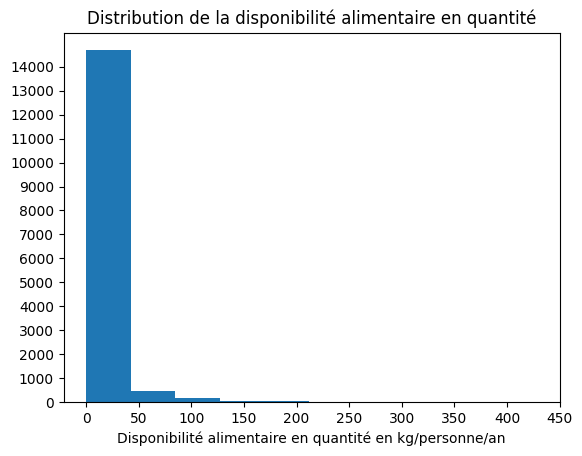

In [753]:
# Histogramme de la colonne disponibilité_alimentaire_en_quantité_(kg/personne/an)
plt.hist(df_exploration['disponibilité_alimentaire_en_quantité_(kg/personne/an)'], bins=10)
plt.title('Distribution de la disponibilité alimentaire en quantité')
plt.xlabel('Disponibilité alimentaire en quantité en kg/personne/an')
plt.xticks(np.arange(0, 500, 50))
plt.yticks(np.arange(0, 15000, 1000))
plt.show()


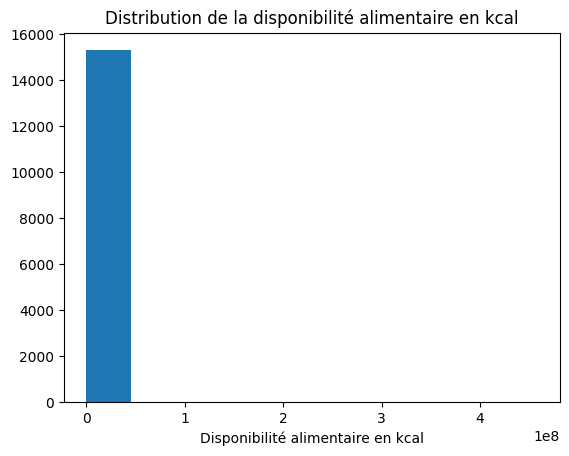

In [754]:
# Histogramme de la colonne disponibilité_alimentaire_(kcal)
plt.hist(df_exploration['disponibilité_alimentaire_(kcal)'], bins=10)
plt.title('Distribution de la disponibilité alimentaire en kcal')
plt.xlabel('Disponibilité alimentaire en kcal')
plt.show()

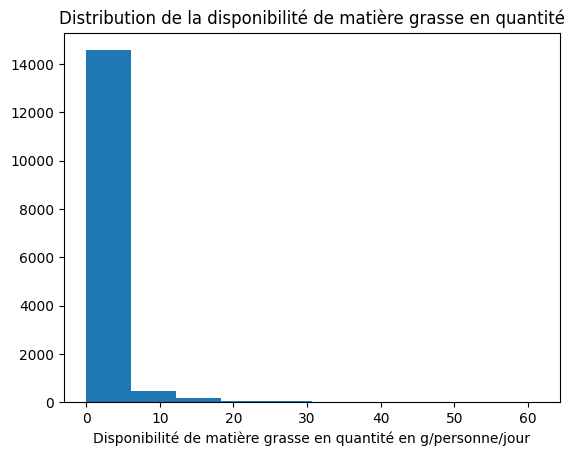

In [755]:
# histogramme de la colonne disponibilité_alimentaire_(kcal)
plt.hist(df_exploration['disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)'], bins=10)
plt.title('Distribution de la disponibilité de matière grasse en quantité')
plt.xlabel('Disponibilité de matière grasse en quantité en g/personne/jour')
plt.show()

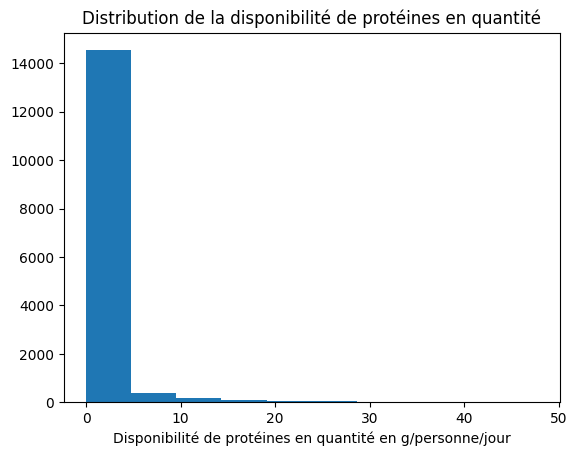

In [756]:
# histogramme de la colonne disponibilité_de_protéines_en_quantité_(g/personne/jour)
plt.hist(df_exploration['disponibilité_de_protéines_en_quantité_(g/personne/jour)'], bins=10)
plt.title('Distribution de la disponibilité de protéines en quantité')
plt.xlabel('Disponibilité de protéines en quantité en g/personne/jour')
plt.show()

### 3.Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)?

In [757]:
# 3.Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)
df_ukraine = df_exploration[df_exploration['zone'] == 'Ukraine']['pop_1000_hab'].values[0]
df_ukraine = df_ukraine * 1000
"la population de l'Ukraine en 2018 est de {} habitants".format(df_ukraine.astype(int))


"la population de l'Ukraine en 2018 est de 44246000 habitants"

### 4. Quels sont les 10 pays les plus peuplés ?

In [758]:
df_peuple = df_exploration.groupby('zone')['pop_1000_hab'].max().reset_index()
df_peuple = df_peuple.sort_values('pop_1000_hab', ascending=False)
df_peuple = df_peuple[df_peuple['zone'] != 'Chine']
df_peuple.head(10)


,zone,pop_1000_hab
36,"Chine, continentale",1427648.00
69,Inde,1352642.28
177,États-Unis d'Amérique,327096.00
70,Indonésie,267671.00
118,Pakistan,212228.00
21,Brésil,209469.00
110,Nigéria,195875.00
14,Bangladesh,161377.00
55,Fédération de Russie,145734.00
78,Japon,127202.00


### 5.Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site. (Si l’erreur est de l’ordre de quelques dizaines de millions, c’est peut-être la méthode de calcul mais si c’est supérieur à 1 milliard, il y a une erreur dans la façon dont vous avez récupérer les données)


In [759]:
df_populations = pd.read_csv('data/df_exploration.csv')
df_populations = df_populations.groupby(['zone', 'année'])['pop_1000_hab'].max().reset_index()
df_populations.columns = ['pays', 'année', 'population']
df_populations['population'] = df_populations['population'] * 1000
df_populations['population'] = df_populations['population'].astype(int)
pays_enlever = ['Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao' , 'Chine, Taiwan Province de']
for pays in pays_enlever:
    df_populations = df_populations[df_populations['pays'] != pays]
df_populations[df_populations['année'].isin([2018, 2019])].groupby('année')['population'].sum()


année
2018    7541198240
2019    7636961520
Name: population, dtype: int64

### 6. Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.

In [760]:
df_exploration.groupby('zone')['zone'].count().sort_values(ascending=True).head(10)

zone
Turkménistan         70
Timor-Leste          76
Ukraine              78
Kiribati             78
Samoa                79
Luxembourg           79
Macédoine du Nord    79
Serbie               79
Pays-Bas             79
Comores              79
Name: zone, dtype: int64

### 7. Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [761]:
df_croissance = pd.read_csv('data/df_exploration.csv')
df_croissance = df_croissance[['année', 'zone', 'pop_1000_hab']]
df_croissance = df_croissance.groupby(["zone" , "année"])['pop_1000_hab'].max().reset_index()
df_croissance['pop_1000_hab'] = df_croissance['pop_1000_hab'] * 1000
df_croissance['pop_1000_hab'] = df_croissance['pop_1000_hab'].astype(int)
df_croissance.columns = ['pays', 'année', 'population']
df_croissance

df_croissance = df_croissance[df_croissance['année'].isin([2018, 2019])]
df_croissance = df_croissance.pivot(index='pays', columns='année', values='population')
df_croissance.columns = ['population_2018', 'population_2019']
df_croissance['taux_croissance'] = (df_croissance['population_2019'] - df_croissance['population_2018']) / df_croissance['population_2018'] * 100
df_croissance['taux_croissance'] = df_croissance['taux_croissance'].round(2)
df_croissance = df_croissance.sort_values('taux_croissance', ascending=False)

df_croissance['taux_croissance'] = df_croissance['taux_croissance'].astype(str) + ' %'
df_croissance.head(10)

,population_2018,population_2019,taux_croissance
pays,,,
Niger,22443000.00,23310720.00,3.87 %
Ouganda,42729000.00,44269590.00,3.61 %
Angola,30810000.00,31825290.00,3.3 %
République démocratique du Congo,84068090.00,86790570.00,3.24 %
Burundi,11175370.00,11530580.00,3.18 %
Mali,19078000.00,19658030.00,3.04 %
Tchad,15478000.00,15946880.00,3.03 %
Oman,4829000.00,4974990.00,3.02 %
République-Unie de Tanzanie,56313000.00,58005460.00,3.01 %


### 8.Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [762]:
df_croissance_geo = pd.read_csv('data/df_exploration.csv')
df_croissance_geo = df_croissance_geo[df_croissance_geo['zone'] != 'Chine']
df_croissance_geo = df_croissance_geo[df_croissance_geo['zone'] != 'Chine - RAS de Hong-Kong']
df_croissance_geo = df_croissance_geo[df_croissance_geo['zone'] != 'Chine - RAS de Macao']
df_croissance_geo = df_croissance_geo[df_croissance_geo['zone'] != 'Chine, Taiwan Province de']
df_croissance_geo['pop_1000_hab'] = df_croissance_geo['pop_1000_hab'] * 1000
df_croissance_geo['pop_1000_hab'] = df_croissance_geo['pop_1000_hab'].astype(int)
df_croissance_geo = df_croissance_geo[['zone_geographique', 'année' , 'pop_1000_hab']]
# # prend une fois chaque zone géographique et chaque année unique
df_croissance_geo = df_croissance_geo.drop_duplicates()
df_croissance_geo
df_croissance_geo = df_croissance_geo.dropna()
# fait le calcul de population par zone géographique et par année
df_croissance_geo = df_croissance_geo.groupby(['zone_geographique', 'année'])['pop_1000_hab'].sum().reset_index()
df_croissance_geo.columns = ['zone_geographique', 'année', 'population']
df_croissance_geo = df_croissance_geo[df_croissance_geo['année'].isin([2018, 2019])]
df_croissance_geo = df_croissance_geo.pivot(index='zone_geographique', columns='année', values='population')
df_croissance_geo.columns = ['population_2018', 'population_2019']
print(df_croissance_geo['population_2018'].sum())
print(df_croissance_geo['population_2019'].sum())
df_croissance_geo['taux_croissance'] = (df_croissance_geo['population_2019'] - df_croissance_geo['population_2018']) / df_croissance_geo['population_2018'] * 100
df_croissance_geo['taux_croissance'] = df_croissance_geo['taux_croissance'].round(2)
df_croissance_geo = df_croissance_geo.sort_values('taux_croissance', ascending=False)
df_croissance_geo['taux_croissance'] = df_croissance_geo['taux_croissance'].astype(str) + ' %'
df_croissance_geo



7541198240
7620538510


,population_2018,population_2019,taux_croissance
zone_geographique,,,
Afrique Centrale,167812090,172952460,3.06 %
Afrique de l'Est,391983170,402747740,2.75 %
Afrique de l'Ouest,381195000,391434110,2.69 %
Mélanésie,10714680,10918510,1.9 %
Afrique du Nord,236727000,241198300,1.89 %
Asie de l'Ouest,256348180,260277140,1.53 %
Micronésie,116000,117610,1.39 %
Afrique Australe,65739000,66629900,1.36 %
Amérique Centrale,175473000,177586520,1.2 %


### 9. Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !


In [763]:
df_dispo = pd.read_csv('data/df_exploration.csv')
df_dispo.columns = df_dispo.columns.str.strip()
df_dispo.columns = df_dispo.columns.str.lower()
df_dispo.columns = df_dispo.columns.str.replace(' ', '_')
df_dispo = df_dispo.rename(columns={'pop_1000_hab': 'population'})
df_dispo['population'] = df_dispo['population'] * 1000
df_dispo['population'] = df_dispo['population'].astype(int)
df_dispo

,code_zone_(fao),zone,année,population,produit,disponibilité_alimentaire_(kcal),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),disponibilité_de_protéines_en_quantité_(g/personne/jour),zone_geographique
0,1,Arménie,2018,2951740,Abats Comestible,21172.20,6.63,0.56,3.25,Asie de l'Ouest
1,1,Arménie,2018,2951740,"Agrumes, Autres",33.60,0.03,0.00,0.00,Asie de l'Ouest
2,1,Arménie,2018,2951740,Aliments pour enfants,1739.60,0.16,0.01,0.07,Asie de l'Ouest
3,1,Arménie,2018,2951740,Ananas et produits,416.70,0.26,0.00,0.00,Asie de l'Ouest
4,1,Arménie,2018,2951740,Animaux Aquatiques Autre,8.40,0.00,0.00,0.00,Asie de l'Ouest
...,...,...,...,...,...,...,...,...,...,...
31423,351,Chine,2019,1465634160,Viande de Volailles,38215653.50,15.45,5.55,5.00,Asie de l'Est
31424,351,Chine,2019,1465634160,Viande de porcins,186348288.80,36.13,33.40,10.93,Asie de l'Est
31425,351,Chine,2019,1465634160,"Viande, Autre",849261.60,0.53,0.06,0.24,Asie de l'Est
31426,351,Chine,2019,1465634160,Vin,1863557.30,1.86,0.00,0.00,Asie de l'Est


In [764]:
pd.options.display.float_format = '{:.2f}'.format
df_filtre = df_dispo[["code_zone_(fao)", "zone", "année", "disponibilité_de_protéines_en_quantité_(g/personne/jour)" , "population"]]
df_agrege = df_filtre.groupby(["code_zone_(fao)", "zone", "année" , "population" ]).sum().reset_index()
df_agrege['disponibilité_de_protéines_en_kg/personne/an'] = df_agrege['disponibilité_de_protéines_en_quantité_(g/personne/jour)'] * 365 / 1000
df_agrege['disponibilité_de_calorie_en_kcal/personne/an'] = df_agrege['disponibilité_de_protéines_en_quantité_(g/personne/jour)'] * 365 * 4
df_agrege['disponibilité_de_protéines_en_kg/personne/an'] = df_agrege['disponibilité_de_protéines_en_kg/personne/an'] * df_agrege["population"]
df_agrege['disponibilité_de_calorie_en_kcal/personne/an'] = df_agrege['disponibilité_de_calorie_en_kcal/personne/an'] * df_agrege["population"]
df_agrege['disponibilité_de_protéines_en_quantité_(g/personne/jour)'] = df_agrege['disponibilité_de_protéines_en_quantité_(g/personne/jour)'] * df_agrege["population"]
df_agrege['disponibilité_de_protéines_en_quantité_(g/personne/jour)'] = df_agrege['disponibilité_de_protéines_en_quantité_(g/personne/jour)'].round(2)
df_agrege['disponibilité_de_protéines_en_kg/personne/an'] = df_agrege['disponibilité_de_protéines_en_kg/personne/an'].round(2)
df_agrege['disponibilité_de_calorie_en_kcal/personne/an'] = df_agrege['disponibilité_de_calorie_en_kcal/personne/an'].round(2)
# renomme des colonnes
df_agrege = df_agrege.rename(columns={'disponibilité_de_protéines_en_quantité_(g/personne/jour)': 'disponibilité_de_protéines_en_g/population/jour'})
df_agrege = df_agrege.rename(columns={'disponibilité_de_protéines_en_kg/personne/an': 'disponibilité_de_protéines_en_kg/population/an'})
df_agrege = df_agrege.rename(columns={'disponibilité_de_calorie_en_kcal/personne/an': 'disponibilité_de_calorie_en_kcal/population/an'})
df_agrege

,code_zone_(fao),zone,année,population,disponibilité_de_protéines_en_g/population/jour,disponibilité_de_protéines_en_kg/population/an,disponibilité_de_calorie_en_kcal/population/an
0,1,Arménie,2018,2951740,300959410.40,109850184.80,439400739184.00
1,1,Arménie,2019,2957730,296837782.80,108345790.72,433383162888.00
2,2,Afghanistan,2018,37172000,2142965800.00,782182517.00,3128730068000.00
3,2,Afghanistan,2019,38041750,2132620505.00,778406484.32,3113625937300.00
4,3,Albanie,2018,2883000,325346550.00,118751490.75,475005963000.00
...,...,...,...,...,...,...,...
361,276,Soudan,2018,41802000,3142256340.00,1146923564.10,4587694256400.00
362,276,Soudan,2019,42813240,3224265104.40,1176856763.11,4707427052424.00
363,277,Soudan du Sud,2019,11062110,709191872.10,258855033.32,1035420133266.00
364,351,Chine,2018,1459378000,152665532580.00,55722919391.70,222891677566800.00


### 10. Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.


In [780]:
df_ratio = df_dispo[df_dispo['année'] == 2019]

df_ratio = df_ratio[['zone', 'produit', 'disponibilité_alimentaire_(kcal)', 'disponibilité_alimentaire_en_quantité_(kg/personne/an)']]

# Remplacer les valeurs nulles par NaN
df_ratio = df_ratio.replace(0, np.nan)

df_ratio['ratio_energie_poids'] = df_ratio['disponibilité_alimentaire_(kcal)'] / df_ratio['disponibilité_alimentaire_en_quantité_(kg/personne/an)'] / 1000

df_ratio_moyenne = df_ratio.groupby('produit')['ratio_energie_poids'].mean().reset_index()

df_ratio_moyenne

,produit,ratio_energie_poids
0,Abats Comestible,54.48
1,"Agrumes, Autres",23.18
2,"Alcool, non Comestible",NaN
3,Aliments pour enfants,154.39
4,Ananas et produits,15.52
5,Animaux Aquatiques Autre,22.95
6,Arachides,196.70
7,Avoine,127.07
8,Bananes,31.23
9,Bananes plantains,17.84


### 11.À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

In [792]:
# prend l'année 2019
df_proteine = df_dispo[df_dispo['année'] == 2019]

# Sélectionner les colonnes pertinentes pour le calcul
df_proteine = df_proteine[['produit', 'disponibilité_alimentaire_en_quantité_(kg/personne/an)', 'disponibilité_de_protéines_en_quantité_(g/personne/jour)']]

# Remplacer les valeurs nulles par NaN pour faciliter les calculs
df_proteine = df_proteine.replace(0, np.nan)

# Calculer le pourcentage de protéine pour chaque aliment
df_proteine['pourcentage_protéine'] = (df_proteine['disponibilité_de_protéines_en_quantité_(g/personne/jour)'] * 100) / (df_proteine['disponibilité_alimentaire_en_quantité_(kg/personne/an)'] * 1000)
# met en pourcentage
df_proteine['pourcentage_protéine'] = df_proteine['pourcentage_protéine'].round(2)
df_proteine['pourcentage_protéine'] = df_proteine['pourcentage_protéine'].astype(str) + ' %'
df_proteine = df_proteine.dropna()
df_proteine

,produit,disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_protéines_en_quantité_(g/personne/jour),pourcentage_protéine
86,Abats Comestible,6.30,3.09,0.05 %
88,Aliments pour enfants,0.16,0.07,0.04 %
91,Arachides,0.76,0.51,0.07 %
92,Avoine,0.46,0.19,0.04 %
93,Bananes,7.17,0.14,0.0 %
...,...,...,...,...
31422,Viande de Bovins,6.30,2.35,0.04 %
31423,Viande de Volailles,15.45,5.00,0.03 %
31424,Viande de porcins,36.13,10.93,0.03 %
31425,"Viande, Autre",0.53,0.24,0.05 %


### 12.Quels sont les 10 aliments les plus caloriques ? Utiliser un diagramme à barres pour visualiser les résultats. À cette étape, vous pouvez vous rendre compte qu’il y a des valeurs aberrantes. Mener votre enquête et corriger le tir.

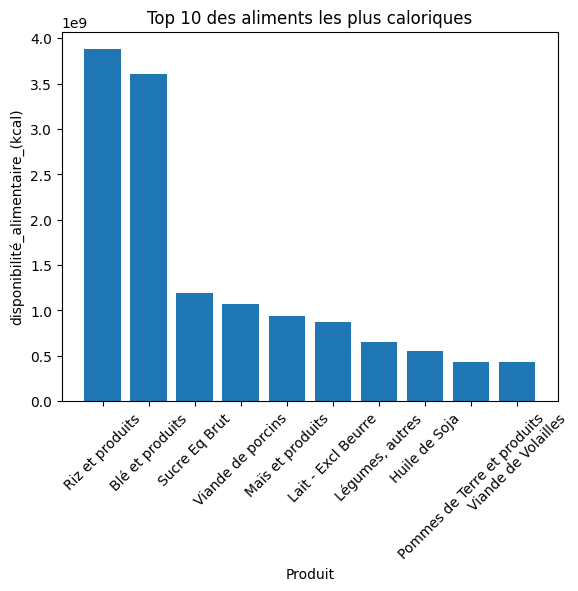

In [795]:
df_calories = df_dispo.groupby('produit')['disponibilité_alimentaire_(kcal)'].sum().reset_index()
df_calories = df_calories.sort_values('disponibilité_alimentaire_(kcal)', ascending=False)
df_calories_top10 = df_calories.head(10)
plt.bar(df_calories_top10['produit'], df_calories_top10['disponibilité_alimentaire_(kcal)'])
plt.title('Top 10 des aliments les plus caloriques')
plt.xlabel('Produit')
plt.xticks(rotation=45)
plt.ylabel('disponibilité_alimentaire_(kcal)')
plt.show()

### 13. Quels sont les 10 aliments les plus riches en protéines ? Utiliser un diagramme à barres pour interpréter les résultats.

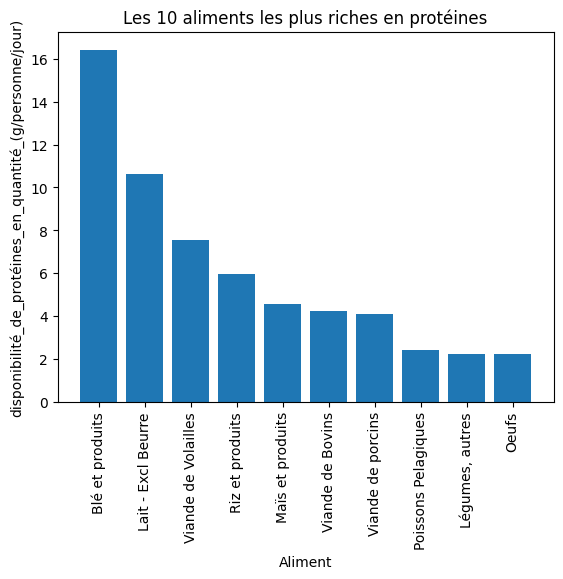

In [801]:
df_proteine_moyenne = df_dispo.groupby('produit')['disponibilité_de_protéines_en_quantité_(g/personne/jour)'].mean().reset_index()
top_10_proteines = df_proteine_moyenne.sort_values(by='disponibilité_de_protéines_en_quantité_(g/personne/jour)', ascending=False).head(10)

plt.bar(top_10_proteines['produit'], top_10_proteines['disponibilité_de_protéines_en_quantité_(g/personne/jour)'])
plt.xticks(rotation=90)
plt.title('Les 10 aliments les plus riches en protéines')
plt.xlabel('Aliment')
plt.ylabel('disponibilité_de_protéines_en_quantité_(g/personne/jour)')
plt.show()

### 14. Créez une boîte à moustache de la quantité de nourriture disponible par habitant en kcal par zone géographique. Afin d’optimiser l’affichage modifier les éléments nécessaires si besoin :
#### Mettez un titre
- La taille du graphique
- Étiquettes des axes, 
- Les axes 
- la couleur en fonction de chaque boite à moustache
Effectuez ce graphique en utilisant la librairie de visualisation seaborn. Interpréter ce graphique.

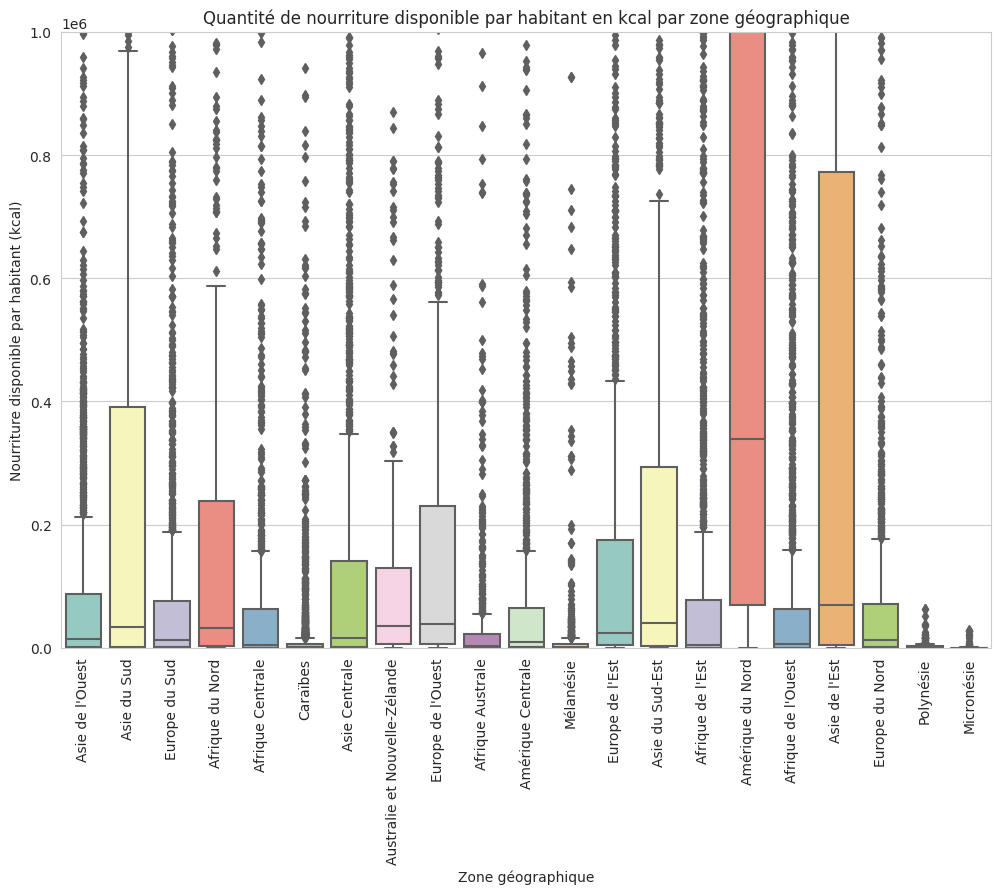

In [818]:
df_boite_moustache = df_dispo[['zone_geographique', 'disponibilité_alimentaire_(kcal)']]

df_boite_moustache = df_boite_moustache.replace(0, np.nan)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.boxplot(x='zone_geographique', y='disponibilité_alimentaire_(kcal)', data=df_boite_moustache, palette="Set3")
plt.title("Quantité de nourriture disponible par habitant en kcal par zone géographique")
plt.xlabel("Zone géographique")
plt.xticks(rotation=90)
plt.ylim(0, 1000000)
plt.ylabel("Nourriture disponible par habitant (kcal)")
plt.show()

### 15. Avec la disponibilité alimentaire combien d’être humains pourrait-on nourrir ? et avec la disponnibilité alimentaire en végétaux ? Pour répondre à cette question vous avez besoin d’estimer les besoins alimentaires moyens d’une personne, effectuer une recherche pour trouver cette information. Interpréter vos résultats. Exprimer vos résultats sous la forme de % de la population mondiale.

### 16. Bonus : Avec la nourriture destinée aux animaux combien d’humains pour être nourris ? (Vous devez récupérer plus d’informations sur le site de la FAO)
